In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("C:/Users/njava/Documents/Visual_Studio_2022/Code_Snippets/Machine Learning/healthcare_dataset.csv")

In [14]:
print(data.info())
print(data.describe(include='all'))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [15]:
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [16]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [17]:
(data.isnull().sum()/(len(data)))*100

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [18]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate Length of Stay
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days


                Age  Billing Amount   Room Number  Length of Stay
count  55500.000000    55500.000000  55500.000000    55500.000000
mean      51.539459    25539.316097    301.134829       15.509009
std       19.602454    14211.454431    115.243069        8.659600
min       13.000000    -2008.492140    101.000000        1.000000
25%       35.000000    13241.224652    202.000000        8.000000
50%       52.000000    25538.069376    302.000000       15.000000
75%       68.000000    37820.508436    401.000000       23.000000
max       89.000000    52764.276736    500.000000       30.000000


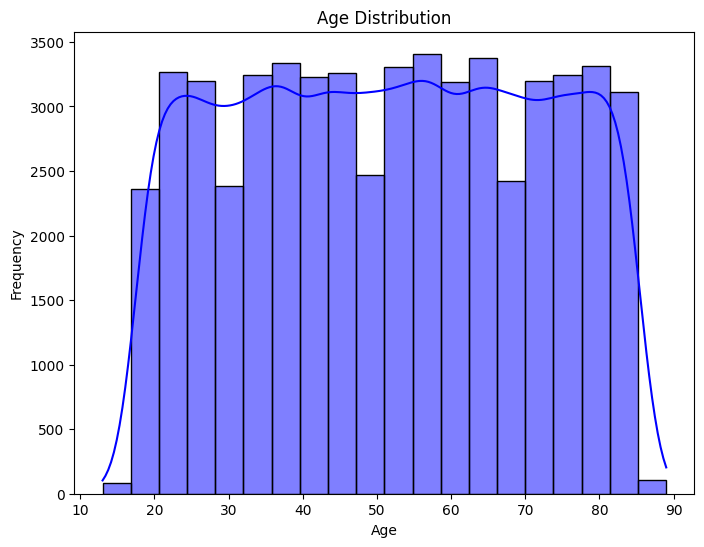

In [19]:
# Statistical summary
print(data[['Age', 'Billing Amount', 'Room Number', 'Length of Stay']].describe())

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

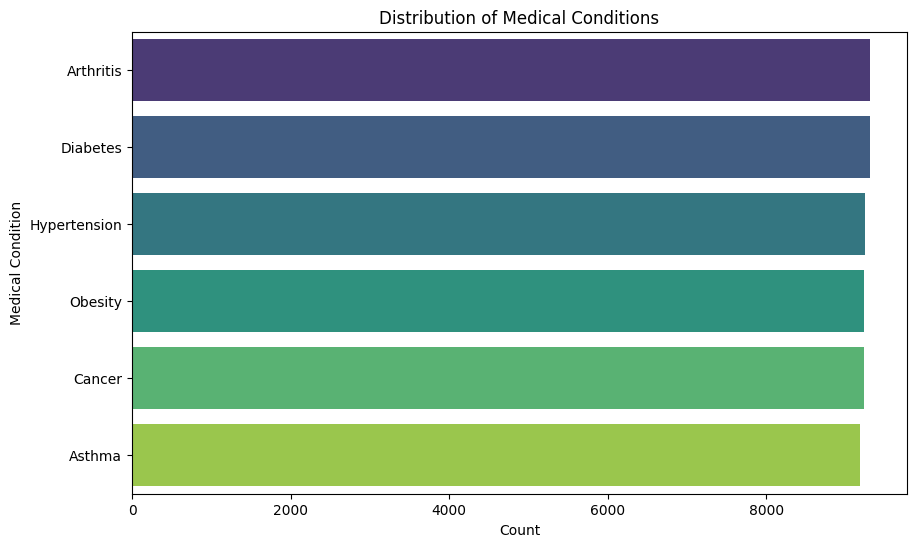

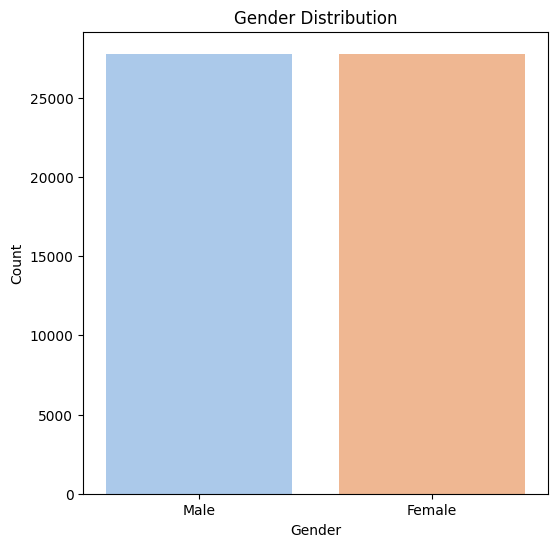

In [20]:
# Countplot for Medical Condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Medical Condition', data=data, palette='viridis', order=data['Medical Condition'].value_counts().index)
plt.title("Distribution of Medical Conditions")
plt.ylabel("Medical Condition")
plt.xlabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

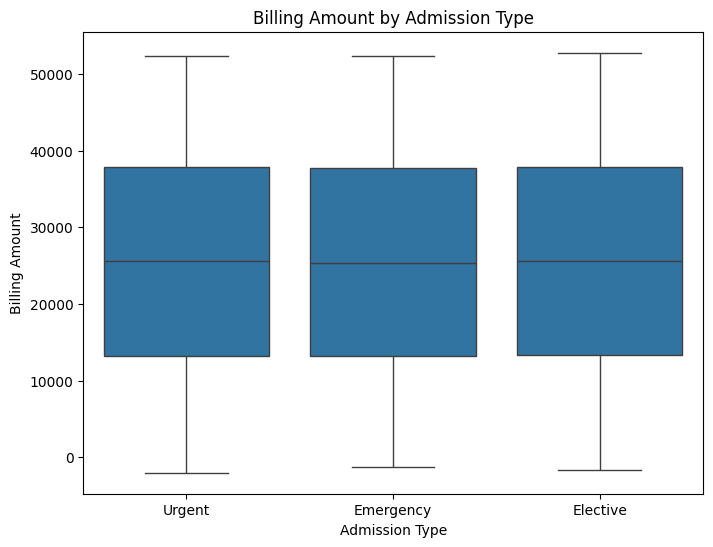

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=data)
plt.title("Billing Amount by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.show()

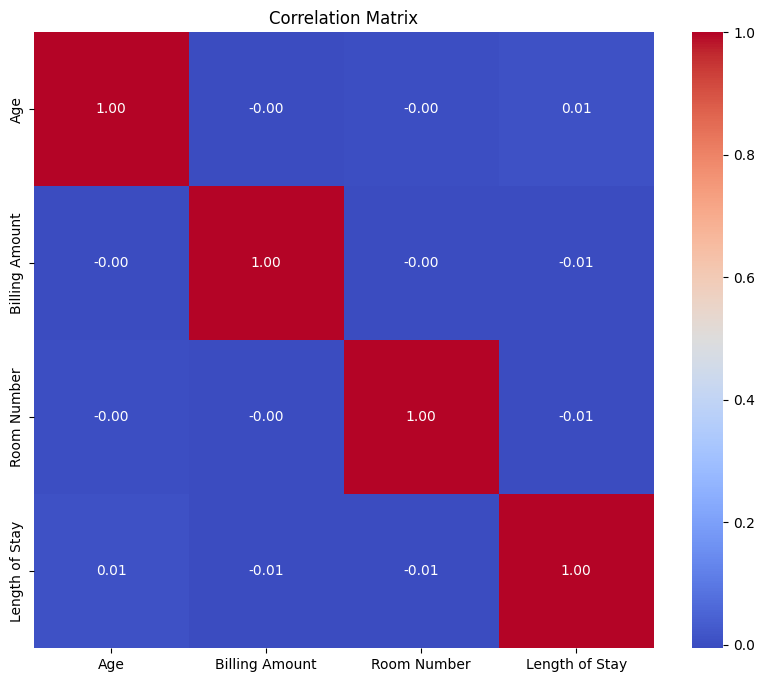

In [22]:
numeric_columns = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

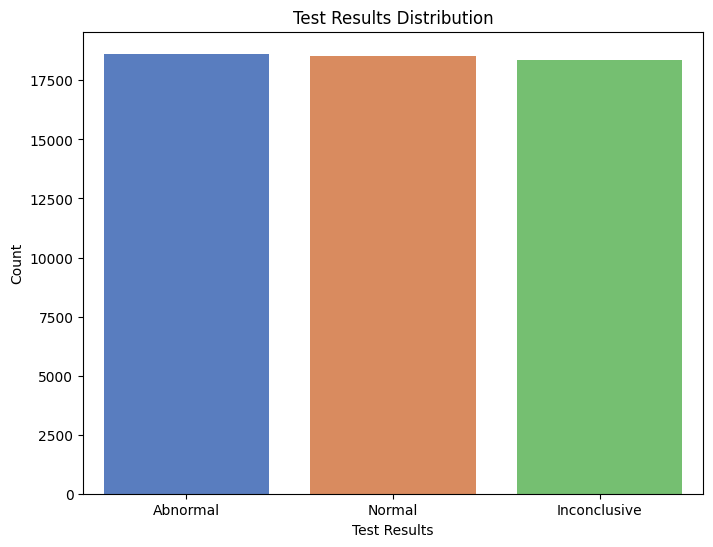

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Test Results', data=data, palette='muted', order=data['Test Results'].value_counts().index)
plt.title("Test Results Distribution")
plt.xlabel("Test Results")
plt.ylabel("Count")
plt.show()